TASK 1

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

data = pd.read_csv("heart.csv")
print("Shape:", data.shape)
print("Info:\n", data.info())
print("Missing Values:", data.isnull().sum().sum())
print("Duplicates:", data.duplicated().sum())

# Rename target column
if 'target' in data.columns:
    data.rename(columns={'target': 'Label'}, inplace=True)

print("\nLabel Distribution:\n", data['Label'].value_counts())

# Handle missing and duplicate values
if data.isnull().sum().sum() > 0:
    data = data.fillna(data.mean())
if data.duplicated().sum() > 0:
    data = data.drop_duplicates()

# Split features and labels
X = data.drop('Label', axis=1)
y = data['Label']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train, test, validation split
X_train_full, X_test, y_train_full, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.3, random_state=0)

# Models
models = {
    'RandomForest': RandomForestClassifier(random_state=0),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0),
    'AdaBoost': AdaBoostClassifier(random_state=0)
}

# Train and evaluate
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))
    results.append({'Model': name, 'Train Accuracy': train_acc, 'Test Accuracy': test_acc})

results_df = pd.DataFrame(results)
print("\nModel Comparison:\n", results_df)


Shape: (1025, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
Info:
 None
Missing Values: 0
Duplicates: 723

Label Distribution:
 Label
1    526
0    499
Name: count, dtype: int64


c:\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [23:10:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Model Comparison:
           Model  Train Accuracy  Test Accuracy
0  RandomForest        1.000000       0.803279
1       XGBoost        1.000000       0.786885
2      AdaBoost        0.970238       0.704918


TASK 2

c:\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [23:10:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [23:11:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [23:11:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [23:11:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Python312\Lib\sit

Voting Classifier Results:
   Voting       Weights  Accuracy
0   hard  (2, 1, 1, 1)  0.785366
1   hard  (1, 1, 2, 1)  0.785366
2   hard  (1, 1, 1, 1)  0.780488
3   hard  (1, 2, 1, 1)  0.780488
4   hard  (1, 1, 1, 2)  0.780488


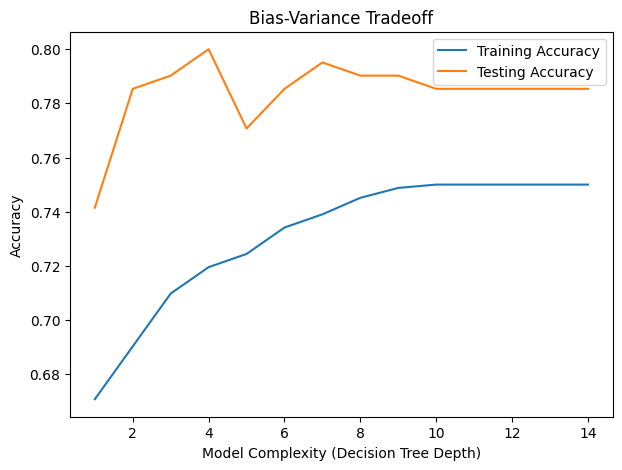

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = pd.read_csv("heart.csv")

# Rename target for consistency
if 'target' in data.columns:
    data.rename(columns={'target': 'Label'}, inplace=True)

# Select features
X = data[['restecg', 'oldpeak']]
y = data['Label']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# Define base models
dt = DecisionTreeClassifier(random_state=0)
knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier(random_state=0)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)

# Try both hard and soft voting
results = []
for voting_type in ['hard', 'soft']:
    for weights in [(1,1,1,1), (2,1,1,1), (1,2,1,1), (1,1,2,1), (1,1,1,2)]:
        voting_clf = VotingClassifier(
            estimators=[('dt', dt), ('knn', knn), ('rf', rf), ('xgb', xgb)],
            voting=voting_type,
            weights=weights
        )
        voting_clf.fit(X_train, y_train)
        y_pred = voting_clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results.append({'Voting': voting_type, 'Weights': weights, 'Accuracy': acc})

results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
print("Voting Classifier Results:\n", results_df.head())

# Bias-Variance tradeoff visualization
train_acc = []
test_acc = []
complexity = range(1, 15)

for depth in complexity:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=0)
    dt.fit(X_train, y_train)
    train_acc.append(dt.score(X_train, y_train))
    test_acc.append(dt.score(X_test, y_test))

plt.figure(figsize=(7,5))
plt.plot(complexity, train_acc, label='Training Accuracy')
plt.plot(complexity, test_acc, label='Testing Accuracy')
plt.xlabel('Model Complexity (Decision Tree Depth)')
plt.ylabel('Accuracy')
plt.title('Bias-Variance Tradeoff')
plt.legend()
plt.show()


TASK 3

c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [23:26:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Random Forest: Train=0.884, Test=0.839
XGBoost: Train=0.866, Test=0.785
Voting Ensemble (RF + AdaBoost): Test Accuracy=0.839


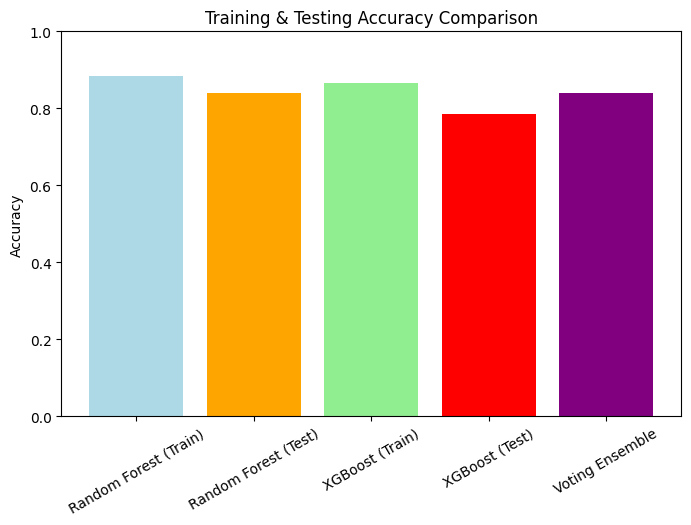

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = pd.read_csv("heart.csv")

# Rename target column for consistency
if 'target' in data.columns:
    data.rename(columns={'target': 'Label'}, inplace=True)

# Select only two features
X = data[['restecg', 'chol']]
y = data['Label']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# Initialize models
rf = RandomForestClassifier(random_state=0)
ab = AdaBoostClassifier(random_state=0)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)

# Train models individually
rf.fit(X_train, y_train)
ab.fit(X_train, y_train)
xgb.fit(X_train, y_train)

# Accuracy scores
rf_train_acc = accuracy_score(y_train, rf.predict(X_train))
rf_test_acc = accuracy_score(y_test, rf.predict(X_test))
xgb_train_acc = accuracy_score(y_train, xgb.predict(X_train))
xgb_test_acc = accuracy_score(y_test, xgb.predict(X_test))

# Voting Ensemble (Random Forest + AdaBoost)
voting = VotingClassifier(estimators=[('rf', rf), ('ab', ab)], voting='soft')
voting.fit(X_train, y_train)
voting_acc = accuracy_score(y_test, voting.predict(X_test))

# Print accuracies
print(f"Random Forest: Train={rf_train_acc:.3f}, Test={rf_test_acc:.3f}")
print(f"XGBoost: Train={xgb_train_acc:.3f}, Test={xgb_test_acc:.3f}")
print(f"Voting Ensemble (RF + AdaBoost): Test Accuracy={voting_acc:.3f}")

# Plot accuracy comparison
models = ['Random Forest (Train)', 'Random Forest (Test)', 'XGBoost (Train)', 'XGBoost (Test)', 'Voting Ensemble']
accuracies = [rf_train_acc, rf_test_acc, xgb_train_acc, xgb_test_acc, voting_acc]

plt.figure(figsize=(8,5))
plt.bar(models, accuracies, color=['lightblue','orange','lightgreen','red','purple'])
plt.xticks(rotation=30)
plt.ylabel('Accuracy')
plt.title('Training & Testing Accuracy Comparison')
plt.ylim(0, 1)
plt.show()
